# Project 3 - Find a Chain Saw 

Find an object in another photo by comparing it with a pattern.
Finding objects in the movie.

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

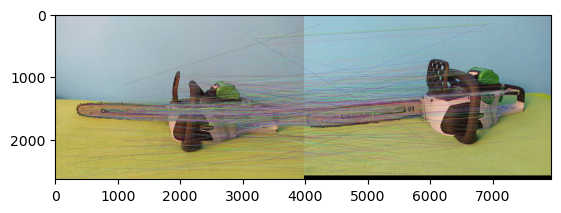

In [27]:
saw1 = cv2.imread('C:\\Users\\katar\\Documents\\semestr 10\\WMR\\projects\\project3\\pics\\saw1.jpg')
saw2 = cv2.imread('C:\\Users\\katar\\Documents\\semestr 10\\WMR\\projects\\project3\\pics\\saw2.jpg')


sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(saw1, None)
kp2, des2 = sift.detectAndCompute(saw2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.85*n.distance:
        good.append([m])

result = cv2.drawMatchesKnn(saw1, kp1, saw2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(result)
plt.show()

In [30]:
saw1 = cv2.imread('C:\\Users\\katar\\Documents\\semestr 10\\WMR\\projects\\project3\\pics\\saw1.jpg')
saw1 = cv2.resize(saw1, (1920,1080), interpolation=cv2.INTER_AREA)
cap = cv2.VideoCapture('C:\\Users\\katar\\Documents\\semestr 10\\WMR\\projects\\project3\\pics\\sawmovie.mp4')

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(saw1, None)

bf = cv2.BFMatcher()
out = cv2.VideoWriter('out2.avi',
                            cv2.VideoWriter_fourcc('M','J','P','G'),
                            10,
                            (neww,newh))

if (cap.isOpened() == False):
    print('ups')
while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        kp2, des2 = sift.detectAndCompute(frame, None)
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)

        good = []
        for m, n in matches:
            if m.distance < 0.75*n.distance:
                good.append([m])

        frame = cv2.drawMatchesKnn(saw1, kp1, frame, kp2, good, frame, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

        #window size adjustment
        h, w = frame.shape[0:2]
        neww = 1000
        newh = int(neww*(h/w))
        frame = cv2.resize(frame, (neww, newh))
        out.write(frame)

    else:
        break    
        #if i==50:
         #   break

cap.release()
cv2.destroyAllWindows()
        